In [227]:
import numpy as np
import pandas as pd

#import libraries for histogram and plots

import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import statsmodels.api as sm

#read and concatonate the dataset - ensure that the dataset is in the correct folder
october = pd.read_csv("C:/Users/jband/Documents/Josh Masters/Dissertation/code/2021 dataset/october.csv")
nov = pd.read_csv("C:/Users/jband/Documents/Josh Masters/Dissertation/code/2021 dataset/november.csv")
dec = pd.read_csv("C:/Users/jband/Documents/Josh Masters/Dissertation/code/2021 dataset/december.csv")
jan = pd.read_csv("C:/Users/jband/Documents/Josh Masters/Dissertation/code/2021 dataset/january.csv")
feb = pd.read_csv("C:/Users/jband/Documents/Josh Masters/Dissertation/code/2021 dataset/february.csv")
march = pd.read_csv("C:/Users/jband/Documents/Josh Masters/Dissertation/code/2021 dataset/march.csv")
april = pd.read_csv("C:/Users/jband/Documents/Josh Masters/Dissertation/code/2021 dataset/april.csv")

files = [october, nov, dec, jan, feb, march, april]

data = pd.concat([file for file in files], ignore_index=True)

data.head()

,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Unnamed: 6,Unnamed: 7,Attend.,Arena,Notes
0,"Tue, Oct 19, 2021",7:30p,Brooklyn Nets,104,Milwaukee Bucks,127,Box Score,NaN,"17,341",Fiserv Forum,NaN
1,"Tue, Oct 19, 2021",10:00p,Golden State Warriors,121,Los Angeles Lakers,114,Box Score,NaN,"18,997",Crypto.com Arena,NaN
2,"Wed, Oct 20, 2021",7:00p,Indiana Pacers,122,Charlotte Hornets,123,Box Score,NaN,"15,521",Spectrum Center,NaN
3,"Wed, Oct 20, 2021",7:00p,Chicago Bulls,94,Detroit Pistons,88,Box Score,NaN,"20,088",Little Caesars Arena,NaN
4,"Wed, Oct 20, 2021",7:30p,Boston Celtics,134,New York Knicks,138,Box Score,2OT,"19,812",Madison Square Garden (IV),NaN


In [228]:
# the shape and column names

print(f"{data.shape}") # 1320 rows and 11 columns
print(f"{data.columns}") # we can see column names - two columns are unnamed
print(f"{data.info()}") # we can see we have two numerical values

(1230, 11)
Index(['Date', 'Start (ET)', 'Visitor/Neutral', 'PTS', 'Home/Neutral', 'PTS.1',
       'Unnamed: 6', 'Unnamed: 7', 'Attend.', 'Arena', 'Notes'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             1230 non-null   object 
 1   Start (ET)       1230 non-null   object 
 2   Visitor/Neutral  1230 non-null   object 
 3   PTS              1230 non-null   int64  
 4   Home/Neutral     1230 non-null   object 
 5   PTS.1            1230 non-null   int64  
 6   Unnamed: 6       1230 non-null   object 
 7   Unnamed: 7       58 non-null     object 
 8   Attend.          1225 non-null   object 
 9   Arena            1230 non-null   object 
 10  Notes            0 non-null      float64
dtypes: float64(1), int64(2), object(8)
memory usage: 105.8+ KB
None


In [229]:
# rename the columns

data.rename(columns={"Start (ET)": "Start", "Visitor/Neutral": "Visitor", "PTS": "vPoints", "Home/Neutral": "Home",
                    "PTS.1": "hPoints", "Unnamed: 6": "BoxScore", "Unnamed: 7": "OT",
                    "Attend.": "Attend"}, inplace=True)

data.head(20)

,Date,Start,Visitor,vPoints,Home,hPoints,BoxScore,OT,Attend,Arena,Notes
0,"Tue, Oct 19, 2021",7:30p,Brooklyn Nets,104,Milwaukee Bucks,127,Box Score,NaN,"17,341",Fiserv Forum,NaN
1,"Tue, Oct 19, 2021",10:00p,Golden State Warriors,121,Los Angeles Lakers,114,Box Score,NaN,"18,997",Crypto.com Arena,NaN
2,"Wed, Oct 20, 2021",7:00p,Indiana Pacers,122,Charlotte Hornets,123,Box Score,NaN,"15,521",Spectrum Center,NaN
3,"Wed, Oct 20, 2021",7:00p,Chicago Bulls,94,Detroit Pistons,88,Box Score,NaN,"20,088",Little Caesars Arena,NaN
4,"Wed, Oct 20, 2021",7:30p,Boston Celtics,134,New York Knicks,138,Box Score,2OT,"19,812",Madison Square Garden (IV),NaN
5,"Wed, Oct 20, 2021",7:30p,Washington Wizards,98,Toronto Raptors,83,Box Score,NaN,"19,800",Scotiabank Arena,NaN
6,"Wed, Oct 20, 2021",8:00p,Cleveland Cavaliers,121,Memphis Grizzlies,132,Box Score,NaN,"15,975",FedEx Forum,NaN
7,"Wed, Oct 20, 2021",8:00p,Houston Rockets,106,Minnesota Timberwolves,124,Box Score,NaN,"16,079",Target Center,NaN
8,"Wed, Oct 20, 2021",8:00p,Philadelphia 76ers,117,New Orleans Pelicans,97,Box Score,NaN,"12,845",Smoothie King Center,NaN
9,"Wed, Oct 20, 2021",8:30p,Orlando Magic,97,San Antonio Spurs,123,Box Score,NaN,"16,697",AT&T Center,NaN


In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1230 non-null   object 
 1   Start     1230 non-null   object 
 2   Visitor   1230 non-null   object 
 3   vPoints   1230 non-null   int64  
 4   Home      1230 non-null   object 
 5   hPoints   1230 non-null   int64  
 6   BoxScore  1230 non-null   object 
 7   OT        58 non-null     object 
 8   Attend    1225 non-null   object 
 9   Arena     1230 non-null   object 
 10  Notes     0 non-null      float64
dtypes: float64(1), int64(2), object(8)
memory usage: 105.8+ KB


In [231]:
#explore what box score, notes and OT are

data['BoxScore'].value_counts() # redundant
data['Notes'].value_counts() #redundant
data['OT'].value_counts() # useful information to check if OT affects teams next game

#remove the redundant variables
data = data.drop(["BoxScore", "Notes"], axis=1)

In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     1230 non-null   object
 1   Start    1230 non-null   object
 2   Visitor  1230 non-null   object
 3   vPoints  1230 non-null   int64 
 4   Home     1230 non-null   object
 5   hPoints  1230 non-null   int64 
 6   OT       58 non-null     object
 7   Attend   1225 non-null   object
 8   Arena    1230 non-null   object
dtypes: int64(2), object(7)
memory usage: 86.6+ KB


In [233]:
# see if there is missing values

import statistics
from scipy import stats

null = data.isnull().sum()

print(null)

# change OT null values to no overtime (no) meaning the game did not go into overtime
data["OT"] = data["OT"].replace(np.NaN, "no")

data['Attend'] = data["Attend"].replace(",", "", regex=True) # remove the commas
data["Attend"] = data["Attend"].replace(np.NaN, "0") # replace missing values to 0 str
data["Attend"] = data["Attend"].astype(int) #change from object to int
data['Attend'] = data['Attend'].replace(0, data['Attend'].mean().astype(int)) # replace missing values with mean

print(data.isnull().sum())

Date          0
Start         0
Visitor       0
vPoints       0
Home          0
hPoints       0
OT         1172
Attend        5
Arena         0
dtype: int64
Date       0
Start      0
Visitor    0
vPoints    0
Home       0
hPoints    0
OT         0
Attend     0
Arena      0
dtype: int64


In [234]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     1230 non-null   object
 1   Start    1230 non-null   object
 2   Visitor  1230 non-null   object
 3   vPoints  1230 non-null   int64 
 4   Home     1230 non-null   object
 5   hPoints  1230 non-null   int64 
 6   OT       1230 non-null   object
 7   Attend   1230 non-null   int32 
 8   Arena    1230 non-null   object
dtypes: int32(1), int64(2), object(6)
memory usage: 81.8+ KB


In [235]:
# change the date into something subscriptable

from datetime import datetime

data['Date'] = pd.to_datetime(data['Date'], format='%a, %b %d, %Y')


In [236]:
# change start time object into int and 24 hour format

#create a func to take a time string as input.
def convert(time):
    hour, minute = map(int, time[:-1].split(':')) #split the time string into hours and minutes
    return (hour + 12) * 100 + minute #since all time are in PM, add 12 to the hour 

#apply the conversion function
data['Start'] = data['Start'].apply(convert)

data.head()

,Date,Start,Visitor,vPoints,Home,hPoints,OT,Attend,Arena
0,2021-10-19,1930,Brooklyn Nets,104,Milwaukee Bucks,127,no,17341,Fiserv Forum
1,2021-10-19,2200,Golden State Warriors,121,Los Angeles Lakers,114,no,18997,Crypto.com Arena
2,2021-10-20,1900,Indiana Pacers,122,Charlotte Hornets,123,no,15521,Spectrum Center
3,2021-10-20,1900,Chicago Bulls,94,Detroit Pistons,88,no,20088,Little Caesars Arena
4,2021-10-20,1930,Boston Celtics,134,New York Knicks,138,2OT,19812,Madison Square Garden (IV)


In [237]:
#create a new feature to sum the away and home team points

data['Total_Pts'] = data['vPoints'] + data['hPoints']

#create a new variable to show point difference.
#we can base that if it is a negative number, the away team won that game
data['Pts_Difference'] = data['hPoints'] - data['vPoints']

data[['Visitor', 'vPoints', 'Home', 'hPoints', 'Total_Pts', 'Pts_Difference']]

,Visitor,vPoints,Home,hPoints,Total_Pts,Pts_Difference
0,Brooklyn Nets,104,Milwaukee Bucks,127,231,23
1,Golden State Warriors,121,Los Angeles Lakers,114,235,-7
2,Indiana Pacers,122,Charlotte Hornets,123,245,1
3,Chicago Bulls,94,Detroit Pistons,88,182,-6
4,Boston Celtics,134,New York Knicks,138,272,4
...,...,...,...,...,...,...
1225,Los Angeles Lakers,146,Denver Nuggets,141,287,-5
1226,Oklahoma City Thunder,88,Los Angeles Clippers,138,226,50
1227,Golden State Warriors,128,New Orleans Pelicans,107,235,-21
1228,Sacramento Kings,116,Phoenix Suns,109,225,-7


In [238]:
#create relative points difference 

#a calculated relative points difference suggests the absolute score difference in tbe game.
#the relative point difference is a value between 0 and 1. Eg. a relative point difference of 0.037037
#suggests that the absolute score difference is 3.7% of the total points scored in the game
#this suggests that the game was relative close in terms of the final score difference

#games with low relative points differences are often those where the outcome is uncertain until the
#very end, making them potentially exciting to watch.

#similarly a larger relative points difference of > 0.8 could indicate a game where one team dominated 
#more in terms of scoring, potentially leading to a less competitive or one-sided match

data['Relative_Pts_Diff'] = abs(data['Pts_Difference']) / data['Total_Pts']

data

,Date,Start,Visitor,vPoints,Home,hPoints,OT,Attend,Arena,Total_Pts,Pts_Difference,Relative_Pts_Diff
0,2021-10-19,1930,Brooklyn Nets,104,Milwaukee Bucks,127,no,17341,Fiserv Forum,231,23,0.099567
1,2021-10-19,2200,Golden State Warriors,121,Los Angeles Lakers,114,no,18997,Crypto.com Arena,235,-7,0.029787
2,2021-10-20,1900,Indiana Pacers,122,Charlotte Hornets,123,no,15521,Spectrum Center,245,1,0.004082
3,2021-10-20,1900,Chicago Bulls,94,Detroit Pistons,88,no,20088,Little Caesars Arena,182,-6,0.032967
4,2021-10-20,1930,Boston Celtics,134,New York Knicks,138,2OT,19812,Madison Square Garden (IV),272,4,0.014706
...,...,...,...,...,...,...,...,...,...,...,...,...
1225,2022-04-10,2130,Los Angeles Lakers,146,Denver Nuggets,141,OT,19520,Ball Arena,287,-5,0.017422
1226,2022-04-10,2130,Oklahoma City Thunder,88,Los Angeles Clippers,138,no,18210,Crypto.com Arena,226,50,0.221239
1227,2022-04-10,2130,Golden State Warriors,128,New Orleans Pelicans,107,no,16595,Smoothie King Center,235,-21,0.089362
1228,2022-04-10,2130,Sacramento Kings,116,Phoenix Suns,109,no,17071,Phoenix Suns Arena,225,-7,0.031111


In [239]:
#create the target variable - classification problem if they win their home game or not

data['HomeWin'] = data['vPoints'] < data["hPoints"]

y_true = data['HomeWin'].values

data[['HomeWin']].head(5)

,HomeWin
0,True
1,False
2,True
3,False
4,True


Home win percentage: 54.39%


Text(0.5, 1.0, "Home Game Victory Distribution: \nPercentage of NBA Teams' Wins on Their Home Court")

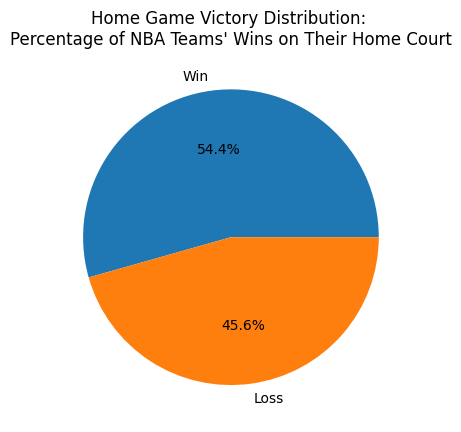

In [240]:
#check the home game win percentage and visually represent it 
import matplotlib.pyplot as plt

n_games = data['HomeWin'].count() #how many games overall

win_games = data['HomeWin'].sum()

win_percentage = win_games / n_games * 100

print(f"Home win percentage: {round(win_percentage, 2)}%")

plt.pie(data['HomeWin'].value_counts(), labels=['Win', 'Loss'], autopct = '%1.1f%%')
plt.title("Home Game Victory Distribution: \nPercentage of NBA Teams' Wins on Their Home Court")

In [241]:
# make a new column to show if the home team won their previous game

# sort the dataset first in ascending order of date
data.sort_values(by = 'Date', inplace=True)

#create dictionary to keep track of home team's previous results
home_prev_win = {team: False for team in data['Home'].unique()}

#create dictionary to keep track of visitor's team's previous results
visitor_prev_win = {team: False for team in data['Visitor'].unique()}

data['Home_Last_Win'] = False
data['Visitor_Last_Win'] = False

#Iterate through the rows of the DataFrame and update the dictionary
for index, row in data.iterrows():
    home_team = row['Home']
    visitor_team = row['Visitor']
    home_win = row['HomeWin']
    data.at[index, 'Home_Last_Win'] = home_prev_win[home_team]
    data.at[index, 'Visitor_Last_Win'] = visitor_prev_win[visitor_team]
    home_prev_win[home_team] = home_win
    visitor_prev_win[visitor_team] = not home_win

data.sort_values(by = 'Date', inplace = True)

data.reset_index(drop = True, inplace = True)

data[['Visitor', 'Home', 'HomeWin', 'Home_Last_Win', 'Visitor_Last_Win']].head(10)

,Visitor,Home,HomeWin,Home_Last_Win,Visitor_Last_Win
0,Brooklyn Nets,Milwaukee Bucks,True,False,False
1,Golden State Warriors,Los Angeles Lakers,False,False,False
2,Cleveland Cavaliers,Memphis Grizzlies,True,False,False
3,Indiana Pacers,Charlotte Hornets,True,False,False
4,Boston Celtics,New York Knicks,True,False,False
5,Washington Wizards,Toronto Raptors,False,False,False
6,Oklahoma City Thunder,Utah Jazz,True,False,False
7,Chicago Bulls,Detroit Pistons,False,False,False
8,Philadelphia 76ers,New Orleans Pelicans,False,False,False
9,Orlando Magic,San Antonio Spurs,True,False,False


In [242]:
# create a new feature for winning streak 

# sort the dataset first in ascending order of date
data.sort_values(by = 'Date', inplace=True)

#create dictionary to keep track of home team's previous win count / default win count is 0
home_win_streak = {team: 0 for team in data['Home'].unique()}

#create the column
data['Previous_Home_Win_Streak'] = 0

for index, row in data.iterrows(): # loops through every row
    home_team = row['Home']
    home_win = row['HomeWin']
    
    # if home win == True then 
    # update value based on previous value then 
    # increment win count for that team
    if home_win:  
        data.at[index, 'Previous_Home_Win_Streak'] = home_win_streak[home_team]
        home_win_streak[home_team] += 1
    
    # if home win == False then
    # update value based on previous value then
    # reset count to 0
    else: 
        data.at[index, 'Previous_Home_Win_Streak'] = home_win_streak[home_team]
        home_win_streak[home_team] = 0
        
data.sort_values(by = 'Date', inplace = True)

data.reset_index(drop = True, inplace = True)
        
data[['Visitor', 'Home', 'HomeWin', 'Home_Last_Win', 'Visitor_Last_Win', 
      'Previous_Home_Win_Streak']].head(10)

,Visitor,Home,HomeWin,Home_Last_Win,Visitor_Last_Win,Previous_Home_Win_Streak
0,Brooklyn Nets,Milwaukee Bucks,True,False,False,0
1,Golden State Warriors,Los Angeles Lakers,False,False,False,0
2,Oklahoma City Thunder,Utah Jazz,True,False,False,0
3,Cleveland Cavaliers,Memphis Grizzlies,True,False,False,0
4,Boston Celtics,New York Knicks,True,False,False,0
5,Washington Wizards,Toronto Raptors,False,False,False,0
6,Sacramento Kings,Portland Trail Blazers,False,False,False,0
7,Indiana Pacers,Charlotte Hornets,True,False,False,0
8,Philadelphia 76ers,New Orleans Pelicans,False,False,False,0
9,Orlando Magic,San Antonio Spurs,True,False,False,0


In [243]:
# create a new feature for standings 
# this feature returns true if the home team was ranked higher on the ladder from the previous season
# we used the previous season to not overfit

ladder = pd.read_csv("C:/Users/jband/Documents/Josh Masters/Dissertation/code/2021 dataset/2020_standings.csv",
                    skiprows=[0], index_col='Team')

def get_home_team_rank_higher(row):
    home_team = row['Home']
    away_team = row['Visitor']
    
    home_rank = ladder.loc[home_team]['Rk']
    away_rank = ladder.loc[away_team]['Rk']
    
    if home_rank and away_rank:  # Check if ranks were found
        return home_rank < away_rank
    else:
        return False  # Default to False if ranks are not found
    
# Apply the function to create the new feature
data['home_team_rank_higher'] = data.apply(get_home_team_rank_higher, axis=1)

data[['Visitor', 'Home', 'home_team_rank_higher']].head()

,Visitor,Home,home_team_rank_higher
0,Brooklyn Nets,Milwaukee Bucks,False
1,Golden State Warriors,Los Angeles Lakers,True
2,Oklahoma City Thunder,Utah Jazz,True
3,Cleveland Cavaliers,Memphis Grizzlies,True
4,Boston Celtics,New York Knicks,True


In [244]:
# create new column to return true if the home team won against the same away team previously

previous_matchups = {}  # dictionary to keep track of previous matchups

data['Previous_Home_Win_Against_Same_Away'] = False # create the column

for index, row in data.iterrows():
    home_team = row['Home']
    visitor_team = row['Visitor']
    home_win = row['HomeWin']
    
    if home_team not in previous_matchups:
        previous_matchups[home_team] = {}
    
    if visitor_team in previous_matchups[home_team]:
        previous_outcome = previous_matchups[home_team][visitor_team]
        data.at[index, 'Previous_Home_Win_Against_Same_Away'] = previous_outcome == 'win'
    
    if home_win:
        previous_matchups[home_team][visitor_team] = 'win'
    else:
        previous_matchups[home_team][visitor_team] = 'loss'

data[['Visitor', 'Home', 'HomeWin','Previous_Home_Win_Against_Same_Away']].loc[
    data['Home'] == 'Atlanta Hawks'].head(20)

,Visitor,Home,HomeWin,Previous_Home_Win_Against_Same_Away
13,Dallas Mavericks,Atlanta Hawks,True,False
45,Detroit Pistons,Atlanta Hawks,True,False
96,Washington Wizards,Atlanta Hawks,True,False
119,Utah Jazz,Atlanta Hawks,False,False
192,Milwaukee Bucks,Atlanta Hawks,True,False
201,Orlando Magic,Atlanta Hawks,True,False
221,Boston Celtics,Atlanta Hawks,True,False
241,Charlotte Hornets,Atlanta Hawks,True,False
253,Oklahoma City Thunder,Atlanta Hawks,True,False
291,New York Knicks,Atlanta Hawks,False,False


In [245]:
data[['Home_Last_Win', 'Visitor_Last_Win', 'home_team_rank_higher',
     'Previous_Home_Win_Against_Same_Away']].head()

,Home_Last_Win,Visitor_Last_Win,home_team_rank_higher,Previous_Home_Win_Against_Same_Away
0,False,False,False,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False


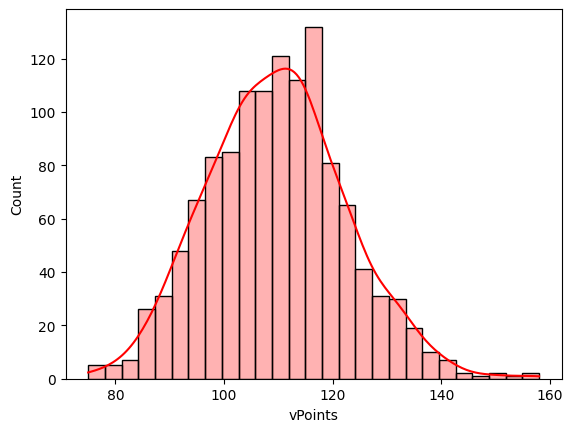

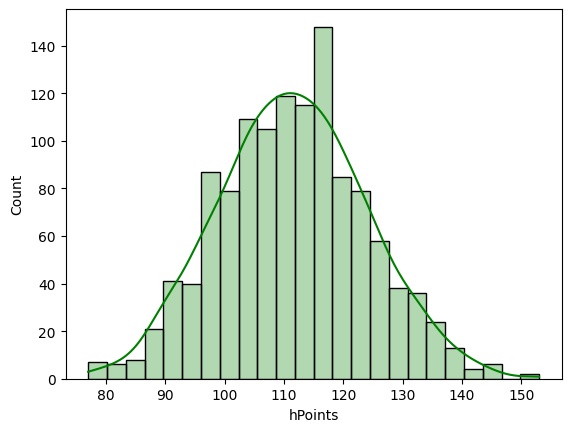

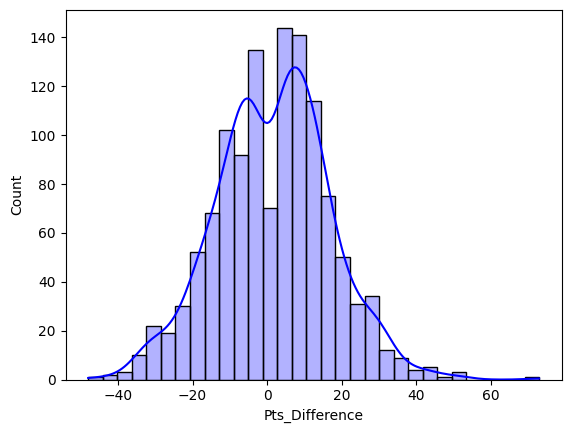

In [246]:
# check normality on the quantitative variables to see what kind of statistical tests are needed

# plot a histogram for visitor points, home points, attendance, total points, points difference and 
# relative points difference 

for x, col in zip(['vPoints', 'hPoints', 'Pts_Difference'], 
                  ['red', 'green', 'blue']):
    sns.histplot(data[x], label = x.title(), kde = True, color = col, alpha = 0.3)
    plt.show()
    
# although rare some teams have scored as high as 175 therefore, this isn't counted as an anomaly 

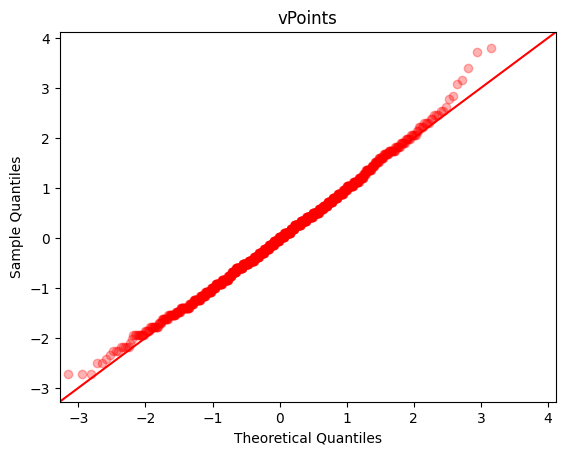

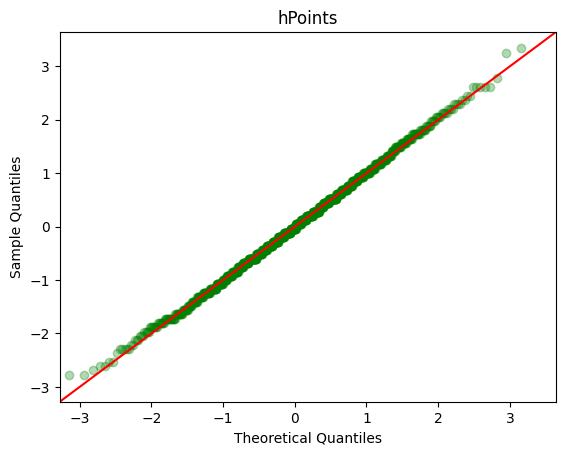

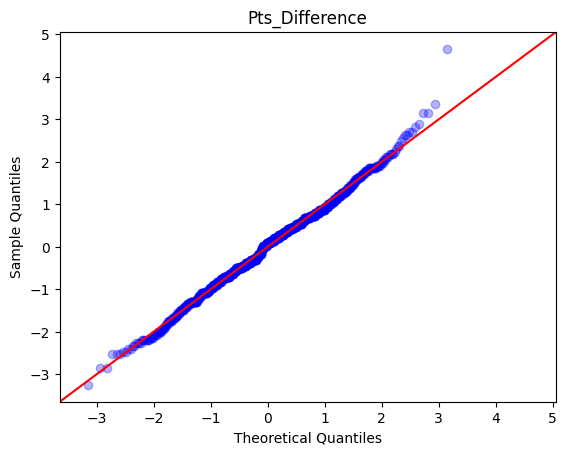

In [247]:
# check normality of residuals to see if data can be used for running a linear model

for x, col in zip(['vPoints', 'hPoints', 'Pts_Difference'], 
                  ['red', 'green', 'blue']):
    sm.qqplot(data[x], markerfacecolor=col, \
              markeredgecolor=col, line="45", fit=True, alpha=0.3)
    plt.title(x)
    plt.show()
    
# although there is one outlier for each plot, the data seems to follow the normal distribution line 
# very well, this means that the data is very close to a gaussian distribution

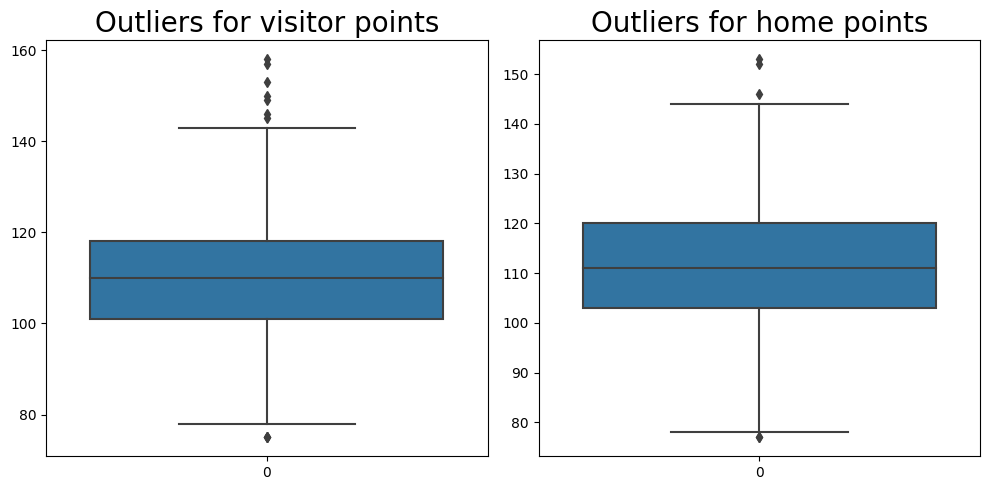

In [248]:
# visually represent outliers and iqr through boxplot

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(ax = ax1, data = data['vPoints'])
sns.boxplot(ax = ax2, data = data['hPoints'])

ax1.set_title("Outliers for visitor points", fontsize = 20)
ax2.set_title("Outliers for home points", fontsize = 20)

fig.tight_layout()
plt.show()

    
# we can see that there are a couple outliers for both features,
# and decided that in order to keep the integrity of the dataset,
# and get a fair representation of the games, we keep the outliers for eda.

In [249]:
# check the skewness value of the away and home team points

for x in ['vPoints', 'hPoints', 'Pts_Difference']:
    print(f"The skewness for {x} is {data[x].skew()}")

# since the value is between -0.5 and 0.5, this indicates that the distribution is fairly symetrical.

The skewness for vPoints is 0.21843410477264685
The skewness for hPoints is 0.0778240390927293
The skewness for Pts_Difference is 0.07588222759073068


In [250]:
from scipy.stats import norm, kurtosis

# perform the kurtosis test to see the sharpness of the histogram tails.

for x in ['vPoints', 'hPoints', 'Pts_Difference']:
    print(f"The skewness for {x} is {kurtosis(data[x])}")
    
# the scipy.stats use the Fisher definition of kurtosis which subtracts 3 from the standard
# definition of kurtosis (so a normal distribution would have a kurtosis value of 0)
# from the results below, we can see that its close to 0. 
# According to Hair et al., 2022, p. 66. When both skewness and kurtosis are close to 0, it is 
# considered a normal distribution

The skewness for vPoints is 0.10543262438243994
The skewness for hPoints is -0.14468726083970074
The skewness for Pts_Difference is 0.3747871236871454


In [251]:
# for sample size, we will do a 70-30 split so 30% will be used for sampling.

In [252]:
# perform a shapiro wilk test to see if the sample comes from a normal distribution

for x in ['vPoints', 'hPoints', 'Pts_Difference']:
    print(f"The p value for {x} is {stats.shapiro(data[x].sample(n = 400, random_state = 3))}")
    
# the null hypothesis = the sample comes from a normal distribution
# alternative hypothesis = the sample is not normally distributed 
# the alpha value set will be 0.05 and the p value is > 0.05 
# this means that we accept the null hypothesis and 
# conclude that the sample comes from a normal distribution

The p value for vPoints is ShapiroResult(statistic=0.9936417937278748, pvalue=0.09141070395708084)
The p value for hPoints is ShapiroResult(statistic=0.9937371611595154, pvalue=0.09746236354112625)
The p value for Pts_Difference is ShapiroResult(statistic=0.9934630990028381, pvalue=0.08104520291090012)


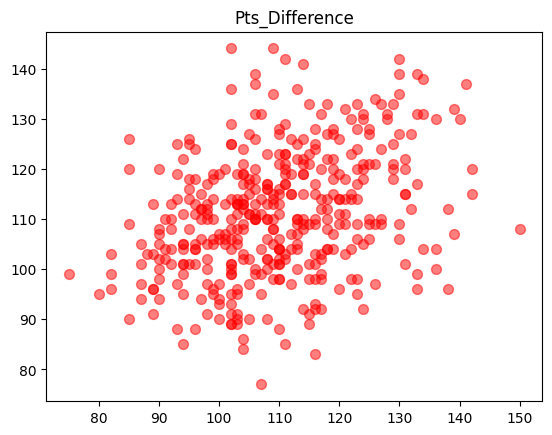

0.33679954544611485


In [253]:
#visualise the correlation between the away and home points

import itertools

plt.scatter(data['vPoints'].sample(n = 400, random_state = 3), 
            data['hPoints'].sample(n = 400, random_state = 3), alpha=0.5, color='red', s = 50)
plt.title(x)
plt.show()

print(data['hPoints'].sample(n = 400, random_state = 3).corr(
    data['vPoints'].sample(n = 400, random_state = 3)))

# with a correlation of 0.3, we can assume this indicates a relatively weak positive correlation.
# This means that as the home points increase, the away team point increase as well but the 
# relationship is not highly predictable between the two. 
# this is because the nba games are unpredictable at times with one team blowing out the other.

In [254]:
# outliers_15_low = (data['vPoints'] < lower_outlier)
# outliers_15_up = (data['vPoints'] > higher_outlier)

# data['vPoints'][(outliers_15_low | outliers_15_up)]

# t = data[~(outliers_15_low | outliers_15_up)].reset_index()

# t[['Visitor', 'Home', 'HomeWin', 'Home_Last_Win', 'Previous_Home_Win_Streak']].tail(30)

In [255]:
# perform EDA 1 - Date 

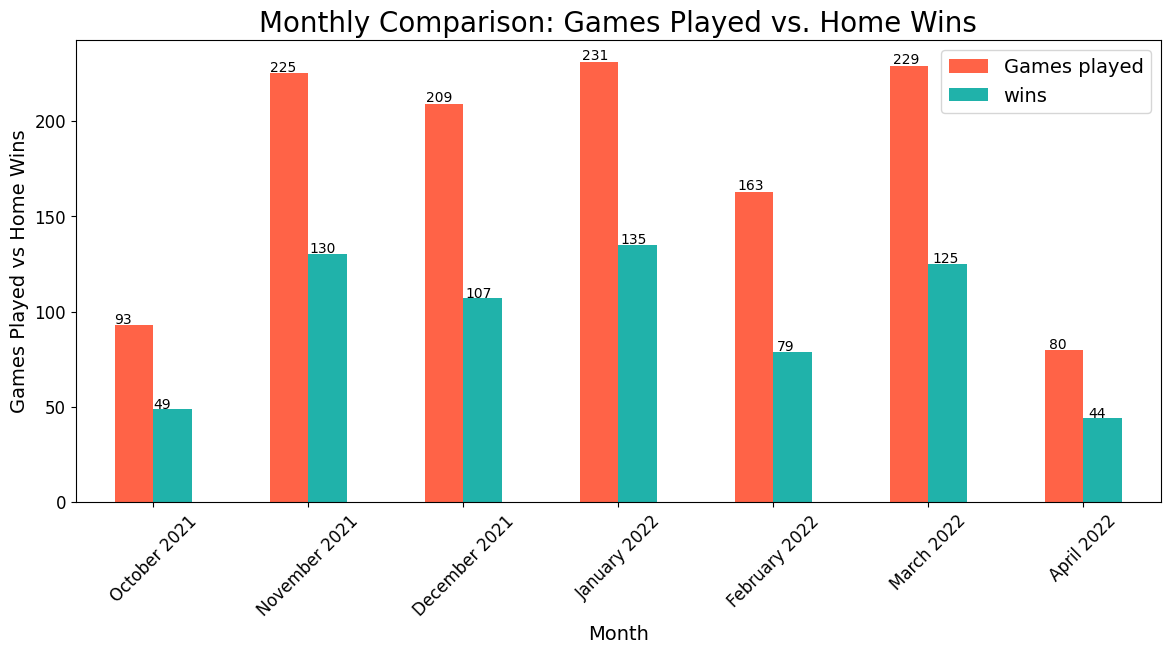

In [256]:
# first is to group games by month and visialize the distribution of home wins

year = data['Date'].dt.month
win = data[data['HomeWin']]

# Group the games by month and count the number of games in each month
games_by_month = data.groupby(
    data['Date'].dt.strftime('%Y-%m')).size().reset_index(name='Games played')
# Change the date into word
games_by_month['Date'] = games_by_month['Date'].apply(
    lambda x: calendar.month_name[int(x.split('-')[1])] + ' ' + x.split('-')[0])

# Group the games by month and count the number of wins 
win_by_month = win.groupby(
    win['Date'].dt.strftime('%Y-%m')).size().reset_index(name='wins')
# Change the date into word
win_by_month['Date'] = win_by_month['Date'].apply(
    lambda x: calendar.month_name[int(x.split('-')[1])] + ' ' + x.split('-')[0])

total = pd.merge(games_by_month, win_by_month, on= 'Date')

#plot the figure

ax = total.plot.bar(x='Date', stacked=False, color = ['tomato', 'lightseagreen'], figsize=(14,6))
plt.title("Monthly Comparison: Games Played vs. Home Wins", fontsize=20)
plt.xlabel("Month", fontsize = 14)
plt.ylabel("Games Played vs Home Wins", fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 14)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

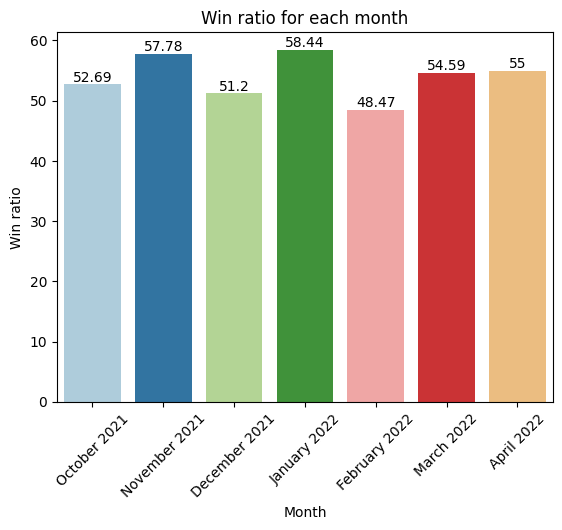

In [257]:
# check the win ratio for each month by dividing the wins and the total games for that month.
total['win_ratio'] = round((total['wins'] / total['Games played']) * 100, 2)

ax = sns.barplot(data = total, x = 'Date', y = 'win_ratio', palette = 'Paired')
plt.title("Win ratio for each month")
plt.ylabel('Win ratio')
plt.xlabel('Month')
plt.xticks(rotation = 45)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

# result show that there is a difference between winning percentages for each month

In [258]:
# create a copy of the dataframe and change the date feature to something more readable

t = data
t['Date'] = t['Date'].dt.strftime('%Y-%m')
t['Date'] = t['Date'].apply(
    lambda x: calendar.month_name[int(x.split('-')[1])] + ' ' + x.split('-')[0])

In [259]:
# Hypothesis Testing
# Does the month that teams play affect their point difference?
# Since the graph above shows that october and november has a higher win percentage than march,
# We can test if the point difference is higher using a oneway anova test
# H0 = There is no difference in point difference across months
# H1 = There is a significant difference in point difference across months

# test if the win percentage for each month is normal distribution in order to do a hypothesis test
# shapiro test H0 = normal distribution / H1 = not normal. If PValue > 0.05, fail to reject null
stat, p_value = stats.shapiro(total['win_ratio'])
is_normal = p_value > 0.05
print(f"p-value for win percentage: {p_value:.4f}, Is Normal: {is_normal}")

from scipy.stats import f_oneway

octo = (t['Pts_Difference'].loc[t['Date'] == 'October 2021'].sample(n=50, random_state=3))
nov = (t['Pts_Difference'].loc[t['Date'] == 'November 2021'].sample(n=50, random_state=3))
dec = (t['Pts_Difference'].loc[t['Date'] == 'December 2021'].sample(n=50, random_state=3))
jan = (t['Pts_Difference'].loc[t['Date'] == 'January 2022'].sample(n=50, random_state=3))
feb = (t['Pts_Difference'].loc[t['Date'] == 'February 2022'].sample(n=50, random_state=3))
march = (t['Pts_Difference'].loc[t['Date'] == 'March 2022'].sample(n=50, random_state=3))
apr = (t['Pts_Difference'].loc[t['Date'] == 'April 2022'].sample(n=50, random_state=3))

f_stat, p_val = f_oneway(octo, nov, dec, jan, feb, march, apr)

# Print results
print("F-statistic:", f_stat)
print("P-value:", p_val)

# there is a type 2 error occured as there is clear evidence that there is a difference in points
# difference for each month, therefore we change the alpha value to 0.5. The p value is now below 
# the alpha value to reject the null hypothesis 

p-value for win percentage: 0.8559, Is Normal: True
F-statistic: 0.986426601502578
P-value: 0.4342370588902362


In [260]:
# EDA 2 - Start Time 

# check if there is any difference of winning for start times

In [261]:
# approach: We will seperate the time into 3 seperate times and for each time group
# get the winning percentage for that group

data['Start'].value_counts()

result = {} # store the values here

before = data[data['Start'] <= 1800]
after = data[(data['Start'] > 1800) & (data['Start'] < 2100)]
night = data[data['Start'] >= 2100]

before_win = round(len(before[before['HomeWin'] == True]) / len(before) * 100, 2)
after_win = round(len(after[after['HomeWin'] == True]) / len(after) * 100, 2)
night_win = round(len(night[night['HomeWin'] == True]) / len(night) * 100, 2)

result['Before 6pm'] = before_win
result['Between 6pm to 9pm'] = after_win
result['After 9pm'] = night_win

result

{'Before 6pm': 55.45, 'Between 6pm to 9pm': 52.86, 'After 9pm': 58.19}

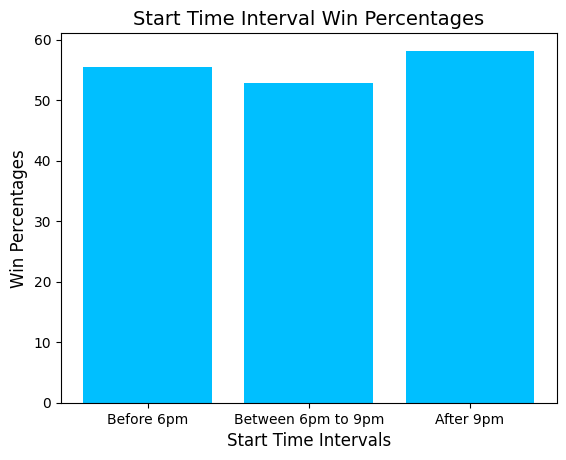

In [262]:
# visualise the win percentages above

ax = plt.bar(*zip(*result.items()), color = 'deepskyblue')
plt.title("Start Time Interval Win Percentages", fontsize = 14)
plt.xlabel("Start Time Intervals", fontsize = 12)
plt.ylabel("Win Percentages", fontsize = 12)
plt.show()

# we can see that there is a clear discrepancy between home court win percentages at different times.
# from the graph below, games that start after 9pm has the highest win percentages

In [263]:
# Hypothesis testing 
# Using oneway anova once again to test the means in points difference for the three time group
# H0 = There is no difference in points difference for each time group
# H1 = There is a difference in points difference for each time group

before_pts = (data['Pts_Difference'].loc[data['Start'] <= 1800]).sample(n = 100, random_state = 3)
between_pts = (data['Pts_Difference'].loc[
    (data['Start'] > 1800) & (data['Start'] < 2100)].sample(n=100, random_state = 3))
after_pts = (data['Pts_Difference'].loc[data['Start'] >= 2100].sample(n = 100, random_state = 3))

f_stat, p_val = f_oneway(before_pts, between_pts, after_pts)

# Print results
print("F-statistic:", f_stat)
print("P-value:", p_val)

# From the Pvalue result, it is above the alpha value which means that we fail reject the null hypothesis 
# and conclude that there is no statistical difference in point difference for each time group.

F-statistic: 0.6040162287242619
P-value: 0.5472819579882304


In [264]:
# do third EDA - Attendance 

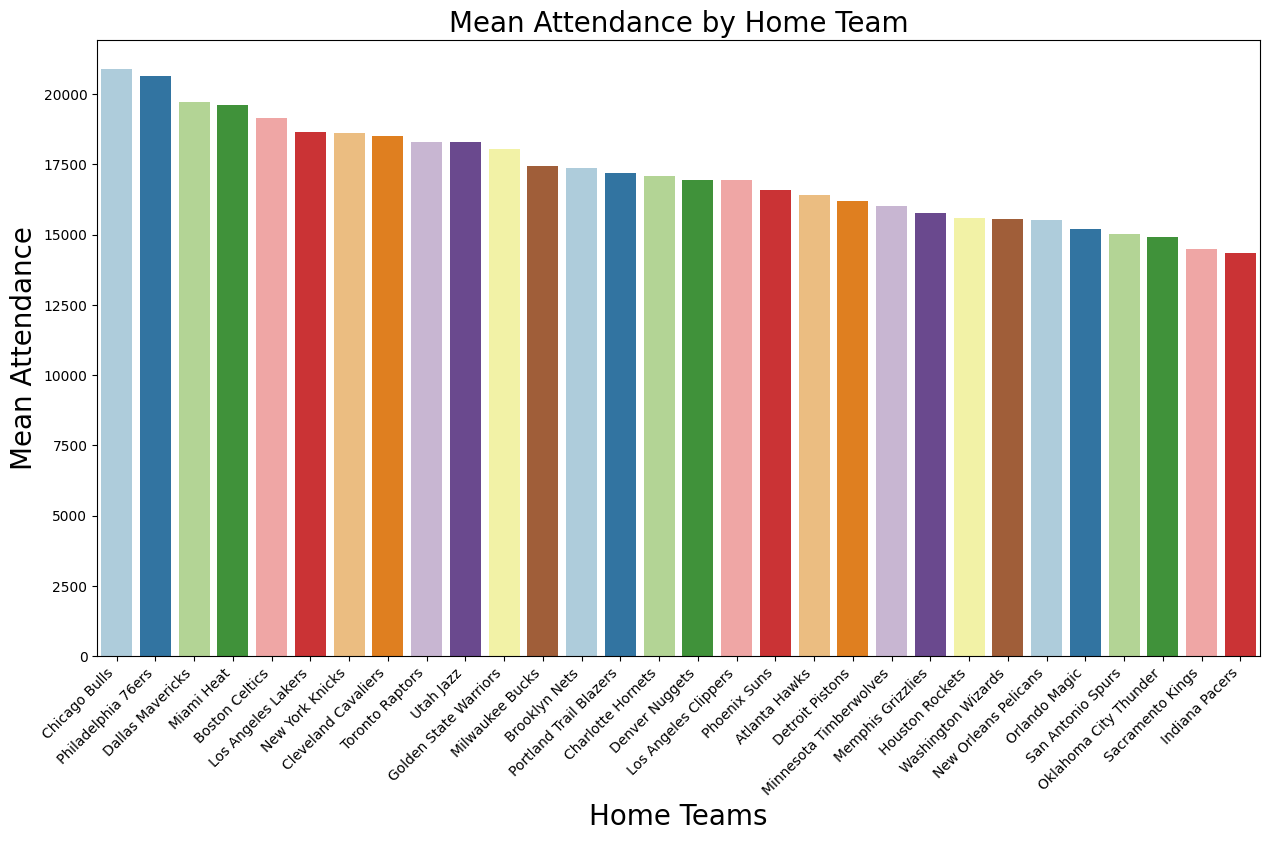

In [265]:
# which team has the most mean attendance

#calculate the mean attendance for each home team
team_attendance = data.groupby(data['Home'], as_index=False)['Attend'].mean()

#sort the teams based on mean attendance
sort_team = team_attendance.sort_values(by = 'Attend', ascending=False).round()
sort_team['Attend'] = sort_team['Attend'].astype(int)

plt.figure(figsize=(15,8))
sns.barplot(x = sort_team['Home'], y = sort_team['Attend'], palette = 'Paired')
plt.title('Mean Attendance by Home Team', fontsize = 20)
plt.xlabel('Home Teams', fontsize = 20)
plt.ylabel('Mean Attendance', fontsize = 20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

# we can observe that chicago bulls on average has the highest viewed games
# next we will see if there is a correlation between the attendance and the win percentage

0.5605039244637409


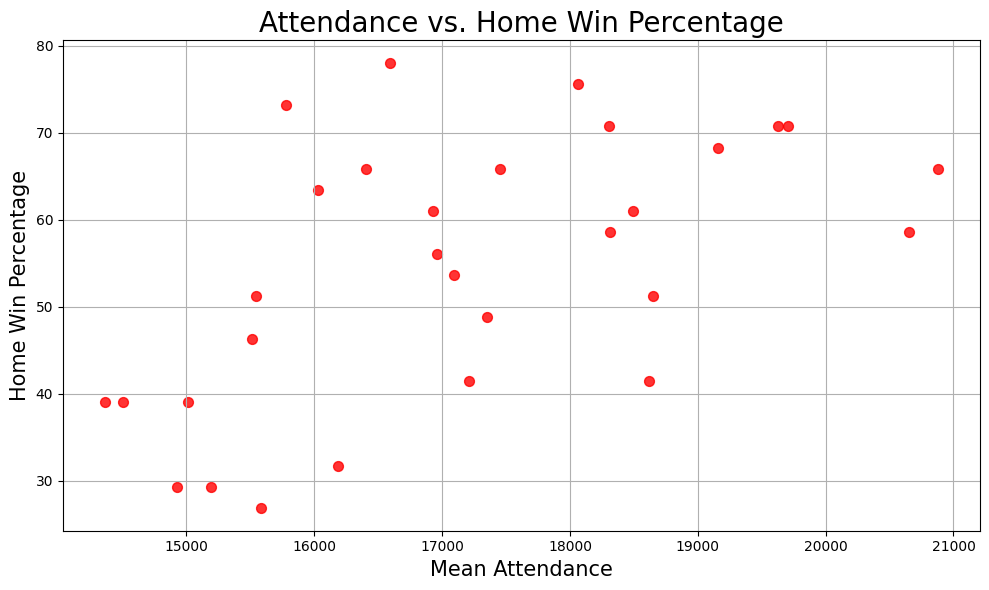

In [266]:
# found out the correlation for each home team win percentage and the mean attendance for that 
# home team 

home_win = round(data[data['HomeWin']]['Home'].value_counts() / data['Home'].value_counts() * 100, 2)
team_attendance = data.groupby(data['Home'])['Attend'].mean()

attend = pd.DataFrame({'Home Win Percentage': home_win, 'Mean Attendance': team_attendance})

correlation = attend['Home Win Percentage'].corr(attend['Mean Attendance'])

print(correlation)

plt.figure(figsize=(10, 6))
plt.scatter(attend['Mean Attendance'], attend['Home Win Percentage'], color='red', alpha = 0.8, s = 50)
plt.title('Attendance vs. Home Win Percentage', fontsize = 20)
plt.xlabel('Mean Attendance', fontsize = 15)
plt.ylabel('Home Win Percentage', fontsize = 15)
plt.grid(True)
plt.tight_layout()

# we can see that there is moderate correlation between the attendance to the win percentage

In [267]:
# test if the win percentage for each team is normal distribution in order to do a hypothesis test
t = pd.DataFrame(home_win).rename_axis('Home Team').reset_index()

stat, p_value = stats.shapiro(t['Home'])
is_normal = p_value > 0.05
print(f"p-value for win percentage: {p_value:.4f}, Is Normal: {is_normal}")

# test if the mean attendance for each team is normal distribution
a = pd.DataFrame(team_attendance).rename_axis("Team Attendance").reset_index()

stat, p_value = stats.shapiro(a['Attend'])
is_normal = p_value > 0.05
print(f"p-value for mean attendance: {p_value:.4f}, Is Normal: {is_normal}")

# we can see that the p value for win percentage and mean attendance for each team is 
# above the alpha value which means we fail to reject the null value and conclude
# that they are normally distributed.

p-value for win percentage: 0.1439, Is Normal: True
p-value for mean attendance: 0.4333, Is Normal: True


In [268]:
# Perfrom hypothesis testing
# Using Pearson Correlation Coefficient Testing:
# http://tiny.cc/1k5avz (explain the assumptions for it)
# H0 = There is no significant difference in team attendance and home win percentage
# H1 = There is a significant difference in team attendance and home win percentage

from scipy.stats import pearsonr

# Calculate correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(
    attend['Mean Attendance'], attend['Home Win Percentage'])

# Print results
print("Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Interpretation
if abs(correlation_coefficient) >= 0.7:
    correlation_strength = "strong"
elif abs(correlation_coefficient) >= 0.4:
    correlation_strength = "moderate"
else:
    correlation_strength = "weak"

if p_value < 0.05:  # Example significance level
    p_value_interpretation = "statistically significant"
else:
    p_value_interpretation = "not statistically significant"

print(f"The correlation is {correlation_strength} and {p_value_interpretation}.")

# The results show that the correlation is statistically significant which implies that
# home teams winning is has a moderate impact on the number of people that attended the game

Correlation Coefficient: 0.5605039244637406
P-value: 0.0012750089140370598
The correlation is moderate and statistically significant.


0.013229391210297528


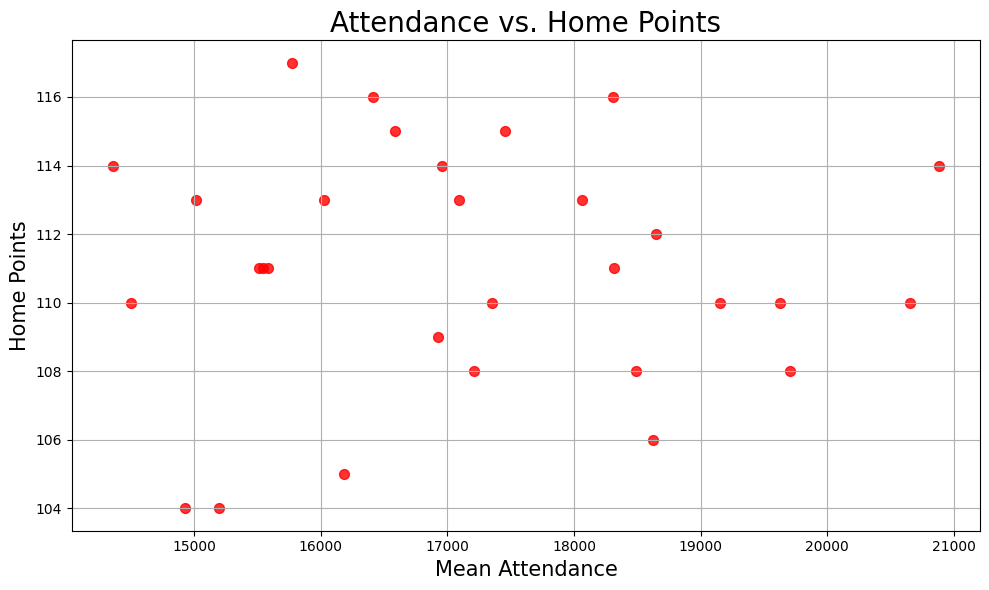

In [269]:
# what about for home points?

mean_home_points = data.groupby('Home')['hPoints'].mean().astype(int)

pts = pd.DataFrame({'Home Points': mean_home_points, 'Mean Attendance': team_attendance})

correlation = pts['Home Points'].corr(pts['Mean Attendance'])

print(correlation)

plt.figure(figsize=(10, 6))
plt.scatter(pts['Mean Attendance'], pts['Home Points'], color='red', alpha = 0.8, s = 50)
plt.title('Attendance vs. Home Points', fontsize = 20)
plt.xlabel('Mean Attendance', fontsize = 15)
plt.ylabel('Home Points', fontsize = 15)
plt.grid(True)
plt.tight_layout()

# no correlation for the points of the and the attendance for each home team

In [270]:
#fourth EDA - arena

# why there was so many people in the alamodome game: 
# https://theathletic.com/4089902/2023/01/13/spurs-warriors-nba-attendance-record-alamodome/

# there are arenas that have different sizes, but do they affect winning performances?

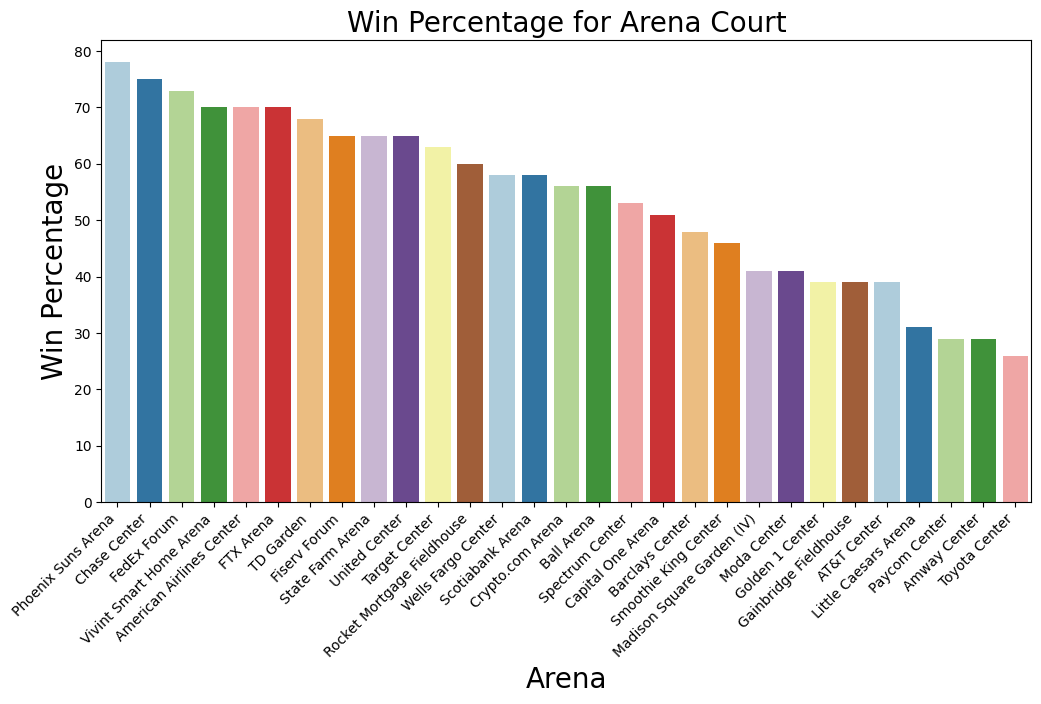

In [271]:
# ARENA EDA

# which arena has the most win percentage?

arena_win = round(data[data['HomeWin']]['Arena'].value_counts() / 
                  data['Arena'].value_counts() * 100, 2)
# there are some null values which indicates that the arena has not won any games

arena_win = pd.DataFrame(arena_win).reset_index()
arena_win.rename(columns={'index': 'Arena', 'Arena': 'Win %'}, inplace=True)

arena_win['Win %'] = arena_win["Win %"].replace(np.NaN, 0) # replace the values with 0 

arena_win['Win %'] = arena_win['Win %'].astype(int)
arena_win = arena_win.sort_values(by = 'Win %', ascending=False) #sort the values in descending order

# visualise the dataset arena_win
plt.figure(figsize=(12,6))
sns.barplot(x = arena_win['Arena'], y = arena_win['Win %'], palette = 'Paired')
plt.title('Win Percentage for Arena Court', fontsize = 20)
plt.xlabel('Arena', fontsize = 20)
plt.ylabel('Win Percentage', fontsize = 20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

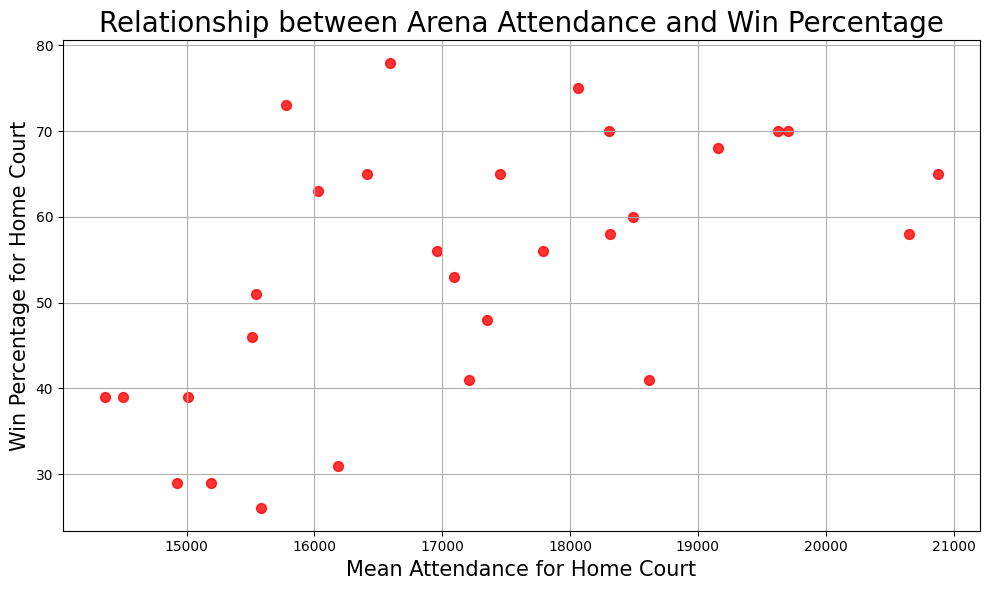

In [272]:
# lets see if the arena with more attendance has an effect on the home teams' win percentage

#create df to group all the arena with their mean attendance
arena_attendance = data.groupby(data['Arena'], as_index=False)['Attend'].mean()
arena_attendance['Attend'] = arena_attendance['Attend'].astype(int)
arena_attendance = pd.DataFrame(arena_attendance)

# merge arena win percetage with arena_attendance df
arena_df = pd.merge(arena_attendance, arena_win, on = 'Arena')

#visualise the result
plt.figure(figsize=(10, 6))
plt.scatter(arena_df['Attend'], arena_df['Win %'], color='red', alpha = 0.8, s = 50)
plt.title('Relationship between Arena Attendance and Win Percentage', fontsize = 20)
plt.xlabel('Mean Attendance for Home Court', fontsize = 15)
plt.ylabel('Win Percentage for Home Court', fontsize = 15)
plt.grid(True)
plt.tight_layout()

# explain the phenomenon of the datapoint with 60k people here

In [273]:
# test if the mean attendance for each arena is normal distribution
stat, p_value = stats.shapiro(arena_df['Attend'])
is_normal = p_value > 0.05
print(f"p-value for mean attendance: {p_value:.4f}, Is Normal: {is_normal}")

# test if the win percentage for each arena is normal distribution
stat, p_value = stats.shapiro(arena_df['Win %'])
is_normal = p_value > 0.05
print(f"p-value for mean attendance: {p_value:.4f}, Is Normal: {is_normal}")

p-value for mean attendance: 0.4305, Is Normal: True
p-value for mean attendance: 0.1578, Is Normal: True


In [274]:
# Hypothesis Testing For The Relationship Between Arena Attendance and Arena Percentage 
# H0 = There is no significant difference in Arena Attendance and the Arena Home Win Percentage
# H1 = There is a significant difference in Arena Attendance and the Arena Home Win Percentage

# Calculate correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(
    arena_df['Attend'], arena_df['Win %'])

# Print results
print("Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Interpretation
if abs(correlation_coefficient) >= 0.7:
    correlation_strength = "strong"
elif abs(correlation_coefficient) >= 0.4:
    correlation_strength = "moderate"
else:
    correlation_strength = "weak"

if p_value < 0.05:  # Example significance level
    p_value_interpretation = "statistically significant"
else:
    p_value_interpretation = "not statistically significant"

print(f"The correlation is {correlation_strength} and {p_value_interpretation}.")

# The hypothesis test shows that we reject the null hypothesis concluding that the number of 
# people that attend in that arena and the arena's win percentage has some correlation as the higher 
# the number of people that attend that arena, the higher chance the home team is to win

Correlation Coefficient: 0.5695186454802288
P-value: 0.0012612343194416354
The correlation is moderate and statistically significant.


In [275]:
# EDA 5 - Overtime

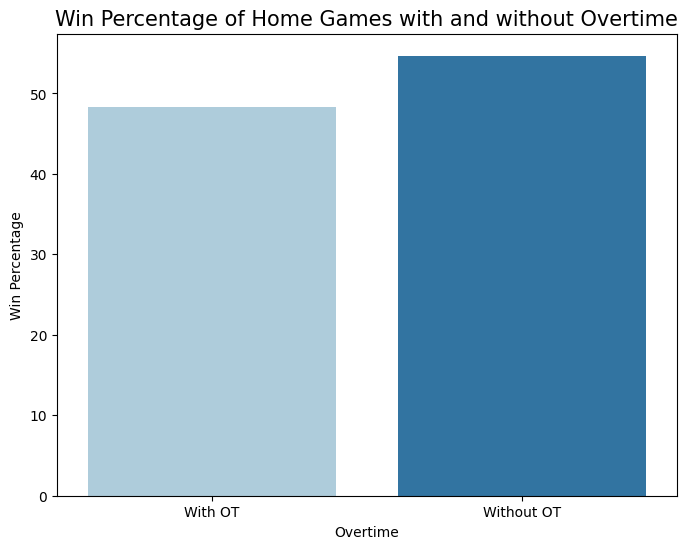

In [276]:
# check if overtime has an effect on the win percentage

#get the win percentage for home teams to win when games go overtime
home_games_with_ot = data[data['HomeWin'] & (data['OT'] != 'no')]
home_games_without_ot = data[data['HomeWin'] & (data['OT'] == 'no')]

win_percentage_with_ot = round(len(home_games_with_ot) / len(data[data['OT'] != 'no']) * 100, 2)
win_percentage_without_ot = round(len(home_games_without_ot) / len(data[data['OT'] == 'no']) * 100, 2)

#create bar plot 
categories = ['With OT', 'Without OT']
win_percentages = [win_percentage_with_ot, win_percentage_without_ot]

plt.figure(figsize=(8,6))
sns.barplot(x = categories, y = win_percentages, palette='Paired')
plt.title("Win Percentage of Home Games with and without Overtime",fontsize =15)
plt.xlabel('Overtime')
plt.ylabel('Win Percentage')
plt.show()

# the graph below shows that on average, home teams tend to perform better and win more frequently
# when games don't go into overtime but lets see if this is significant 

In [277]:
# perform hypothesis testing

#The goal is to assess whether the observed difference
#in proportions is likely to occur by chance or if it represents a real effect.

from statsmodels.stats.proportion import proportions_ztest

games_with_ot = data[data['OT'] != 'no']
games_without_ot = data[data['OT'] == 'no']

win_count_with_ot = len(games_with_ot[games_with_ot['HomeWin']])
total_games_with_ot = len(games_with_ot)

win_count_without_ot = len(games_without_ot[games_without_ot['HomeWin']])
total_games_without_ot = len(games_without_ot)

# Perform the proportions z-test
count = [win_count_with_ot, win_count_without_ot]
nobs = [total_games_with_ot, total_games_without_ot]

stat, p_value = proportions_ztest(count, nobs)

# Print the p-value
print('P-value:', p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')
    
# we can conclude that the winning percentages for OT or not is statistically significant
# This means that there is very little evidence to support that home teams tend to perform better
# if the game did not go into overtime

P-value: 0.3381735274728285
Fail to reject the null hypothesis.


In [278]:
# EDA 6 - Won Last Game

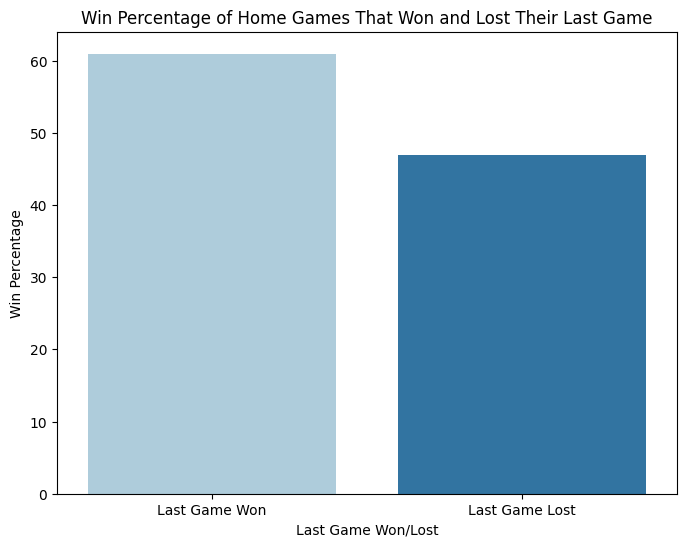

In [279]:
# the approach is to count the win percentages of the home team for true or false
# we will find out the answer to the question: Does winning previously for the home team affect their 
# next game?

home_true = data[(data['HomeWin']) & (data['Home_Last_Win'])]
home_false = data[(data['HomeWin']) & (data['Home_Last_Win'] == False)]

home_true_win_percentage = round(len(home_true) / len(data[data['Home_Last_Win']]) * 100, 2)
home_false_win_percentage = round(len(home_false) / len(data[data['Home_Last_Win'] == False]) * 100, 2)

#create bar plot 
categories = ['Last Game Won', 'Last Game Lost']
win_percentages = [home_true_win_percentage, home_false_win_percentage]

plt.figure(figsize=(8,6))
sns.barplot(x = categories, y = win_percentages, palette='Paired')
plt.title("Win Percentage of Home Games That Won and Lost Their Last Game")
plt.xlabel('Last Game Won/Lost')
plt.ylabel('Win Percentage')
plt.show()

# we can see there is a big descrepancy for the winning percentages
# we can confirm this by hypothesis testing

In [280]:
#Perform Hypothesis testing on: Does winning the home team's last game affect their next game?

# Separate the data into games with previous win and games with previous loss
games_with_prev_win = data[data['Home_Last_Win'] == True]
games_with_prev_loss = data[data['Home_Last_Win'] == False]

# Calculate the win counts and total games for each group
win_count_with_prev_win = len(games_with_prev_win[games_with_prev_win['HomeWin']])
total_games_with_prev_win = len(games_with_prev_win)

win_count_with_prev_loss = len(games_with_prev_loss[games_with_prev_loss['HomeWin']])
total_games_with_prev_loss = len(games_with_prev_loss)

# Perform the two-sample proportion test
count = [win_count_with_prev_win, win_count_with_prev_loss]
nobs = [total_games_with_prev_win, total_games_with_prev_loss]

stat, p_value = proportions_ztest(count, nobs)

# Print the p-value
print('P-value:', p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis. There is a significant difference in win percentages.')
else:
    print('Fail to reject the null hypothesis. There is no significant difference in win percentages.')
    
# from the graph and the p-value result above, we can safely conclude that on average,
# home teams that won their last home game tend to have a much higher winning percentage of winning 
# their next home game than that losing their last home game
# team rapport and morale would come into play 

P-value: 8.950034587644166e-07
Reject the null hypothesis. There is a significant difference in win percentages.


In [281]:
# EDA 7 - Team winning streak

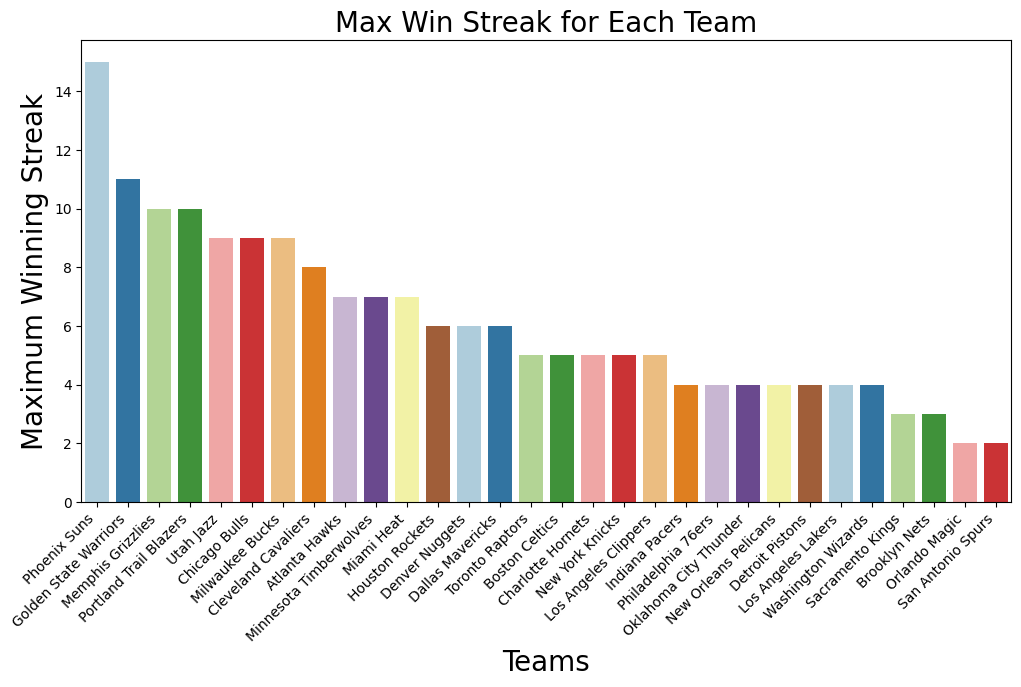

In [282]:
# check which team had the most streak and visualise it

max_streak_value = data.groupby('Home')['Previous_Home_Win_Streak'].max()
max_streak = pd.DataFrame(max_streak_value).reset_index()
max_streak = max_streak.sort_values(by = 'Previous_Home_Win_Streak', ascending=False)

# visualise the teams and their max win streak
plt.figure(figsize=(12,6))
sns.barplot(x = max_streak['Home'], y = max_streak['Previous_Home_Win_Streak'], palette = 'Paired')
plt.title('Max Win Streak for Each Team', fontsize = 20)
plt.xlabel('Teams', fontsize = 20)
plt.ylabel('Maximum Winning Streak', fontsize = 20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

# from the figure below, we can see that denver nuggets have the maximum winning streak

The correlation coefficient is 0.67


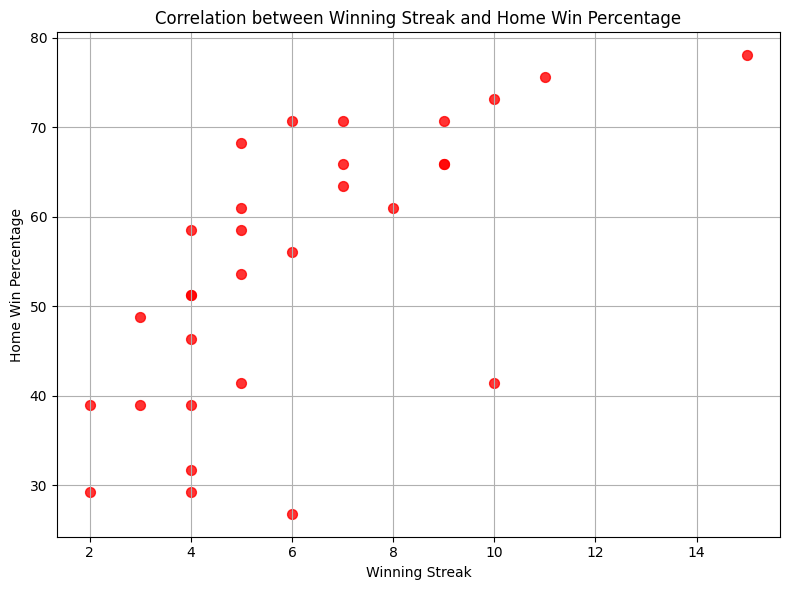

In [283]:
#based on the data above, can we link the number of winning streak to winning percentage?

#first create the winning percentage of each team's home games
home_teams = data['Home'].unique()
home_team_winning_percentage = []
relative_pts = []

for team in home_teams:
    team_data = data[data['Home'] == team]
    total_games = len(team_data) 
    total_wins = len(team_data[team_data['HomeWin'] == True])
    winning_percentage = round(total_wins / total_games * 100, 2)
    home_team_winning_percentage.append({'Home': team, 'Winning Percentage': winning_percentage})
    
    relative_pts_diff = data['Relative_Pts_Diff'][data['Home'] == team].mean()
    relative_pts.append({'Home': team, 'Relative Points Difference': relative_pts_diff}) 

df = pd.DataFrame(home_team_winning_percentage)
df1 = pd.DataFrame(relative_pts)

# next merge the two datasets containing the winning streak and winning percentage
merged = pd.merge(df, max_streak, on= 'Home')
merged = pd.merge(df1, merged, on='Home')

# Calculate Pearson's correlation coefficient
correlation_coefficient = merged['Winning Percentage'].corr(merged['Previous_Home_Win_Streak']) 

print(f"The correlation coefficient is {round(correlation_coefficient, 2)}")

# plot the scatter plot 
plt.figure(figsize=(8, 6))
plt.scatter(merged['Previous_Home_Win_Streak'], 
            merged['Winning Percentage'], color = 'red', s = 50, alpha = 0.8)
plt.title('Correlation between Winning Streak and Home Win Percentage')
plt.xlabel('Winning Streak')
plt.ylabel('Home Win Percentage')
plt.grid(True)
plt.tight_layout()
plt.show()

# with the graph below we can conclude that there is a correlation between the teams overall winning 
# percentage and their maximum winning streak. 
# the graph shows that teams with a higher winning streak usually has a much higher home win chance.

The correlation coefficient is 0.26


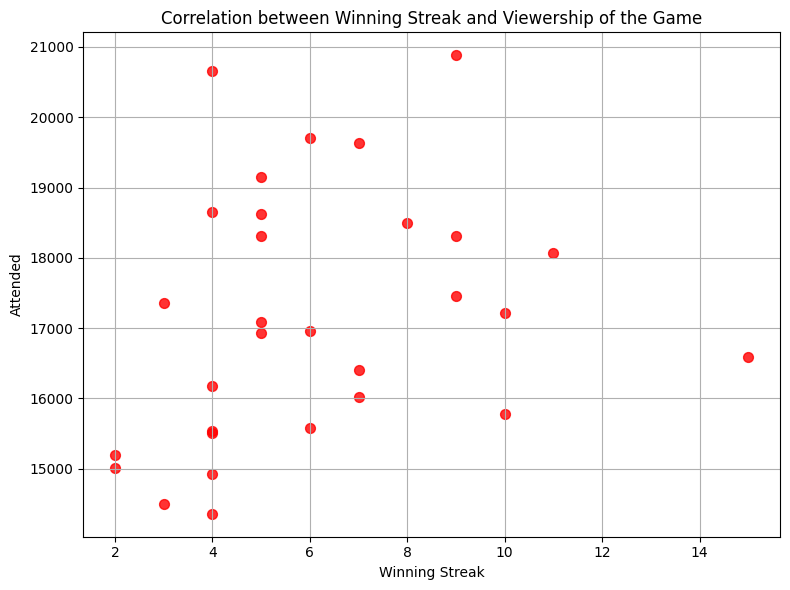

In [284]:
# how about checking if there is a correlation with the teams winning streak and the number of people 
# that see them play

# merge dataframe created from before
team_streak_attend = pd.merge(merged, sort_team, on='Home')

# Calculate Pearson's correlation coefficient
correlation_coefficient = team_streak_attend['Previous_Home_Win_Streak'].corr(
    team_streak_attend['Attend']) 

print(f"The correlation coefficient is {round(correlation_coefficient, 2)}")

# plot the scatter plot 
plt.figure(figsize=(8, 6))
plt.scatter(team_streak_attend['Previous_Home_Win_Streak'], 
            team_streak_attend['Attend'], color = 'red', s = 50, alpha = 0.8)
plt.title('Correlation between Winning Streak and Viewership of the Game')
plt.xlabel('Winning Streak')
plt.ylabel('Attended')
plt.grid(True)
plt.tight_layout()
plt.show()

# the graph below shows very little to no correlation between the winning streak and the number of people
# that attended. This shows that people that attend their home team's game despite their winning streak
# may be the case of fan loyalty.

In [285]:
# Hypothesis testing on winning streak and the relative points difference
# H0 = There is no difference between the teams's win streak and their mean point difference 
# H1 = There is a difference between the teams's win streak and their mean point difference 

# check if the relative points difference is normally distributed 
stat, p_value = stats.shapiro(merged['Relative Points Difference'])
is_normal = p_value > 0.05
print(f"p-value for mean attendance: {p_value:.4f}, Is Normal: {is_normal}")

# since it is normally distributed we can continue on 

# Calculate correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(
    merged['Previous_Home_Win_Streak'], merged['Relative Points Difference'])

# Print results
print("Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Interpretation
if abs(correlation_coefficient) >= 0.7:
    correlation_strength = "strong"
elif abs(correlation_coefficient) >= 0.4:
    correlation_strength = "moderate"
else:
    correlation_strength = "weak"

if p_value < 0.05:  # Example significance level
    p_value_interpretation = "statistically significant"
else:
    p_value_interpretation = "not statistically significant"

print(f"The correlation is {correlation_strength} and {p_value_interpretation}.")

# The test shows that we reject the null hypothesis and conclude that the relationship
# between the home's max win streak and their mean relative point difference is statistically 
# significant.

p-value for mean attendance: 0.3135, Is Normal: True
Correlation Coefficient: 0.41485864806376394
P-value: 0.022634655332705922
The correlation is moderate and statistically significant.


In [286]:
# BREAK - ML 
# My X variable will contain the home and away teams, home and away last win, home team ranks higher
# and home team won against same away team

In [287]:
# perform encoding on the categorical features

df = data.copy()

from sklearn.preprocessing import LabelEncoder

# Date column - label encoding 0-6 for the months 
label_encoder = LabelEncoder()
encoded_column = label_encoder.fit_transform(data['Date'])

df['Date'] = encoded_column

date = df['Date'].copy()

In [288]:
# Apply one hot encoding for the away and home teams 

from sklearn.preprocessing import OneHotEncoder

# Converting type of columns to category
df['Home'] = df['Home'].astype('category')
df['Visitor'] = df['Visitor'].astype('category')

# Assigning numerical values and storing it in another columns
# df['Home'] = df['Home'].cat.codes
# df['Visitor'] = df['Visitor'].cat.codes

# Create an instance of One-hot-encoder
encoder_home = OneHotEncoder()
encoder_away = OneHotEncoder()

# Passing encoded columns
encoded_data_home = encoder_home.fit_transform(df[['Home']])
encoded_data_away = encoder_away.fit_transform(df[['Visitor']])

# Get the column names after one-hot encoding
encoded_columns_home = encoder_home.get_feature_names_out(input_features=['Home'])
encoded_columns_away = encoder_away.get_feature_names_out(input_features=['Visitor'])

# Create a DataFrame with encoded data
encoded_df_home = pd.DataFrame(encoded_data_home.toarray(), columns=encoded_columns_home)
encoded_df_away = pd.DataFrame(encoded_data_away.toarray(), columns=encoded_columns_away)

#print(encoded_df_away) # use this to merge after doing all the one hot encoding

# approach is to encode every categorical data and place them into a variable and then 
# at the end concat everything in the order of the original dataframe

encoded_df_away

# Merge with the main DataFrame
#New_df = pd.concat([df.drop(['Home', 'Visitor'], axis=1), encoded_df], axis=1)

,Visitor_Atlanta Hawks,Visitor_Boston Celtics,Visitor_Brooklyn Nets,Visitor_Charlotte Hornets,Visitor_Chicago Bulls,Visitor_Cleveland Cavaliers,Visitor_Dallas Mavericks,Visitor_Denver Nuggets,Visitor_Detroit Pistons,Visitor_Golden State Warriors,...,Visitor_Oklahoma City Thunder,Visitor_Orlando Magic,Visitor_Philadelphia 76ers,Visitor_Phoenix Suns,Visitor_Portland Trail Blazers,Visitor_Sacramento Kings,Visitor_San Antonio Spurs,Visitor_Toronto Raptors,Visitor_Utah Jazz,Visitor_Washington Wizards
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [289]:
# next is HomeWin which is the target variable so lets name it y and convert true to 1 and false to 0
# and to perform random under sampling 

y = df['HomeWin'].astype(int)

print(y)

0       1
1       0
2       1
3       1
4       1
       ..
1225    0
1226    1
1227    1
1228    1
1229    0
Name: HomeWin, Length: 1230, dtype: int32


In [290]:
# home last win and visitor last win

home_last_win = df['Home_Last_Win'].astype(int)
away_last_win = df['Visitor_Last_Win'].astype(int)

home_last_win


0       0
1       0
2       0
3       0
4       0
       ..
1225    1
1226    1
1227    1
1228    0
1229    0
Name: Home_Last_Win, Length: 1230, dtype: int32

In [291]:
# home team rank higher and previous home win against same away

home_team_rank_higher = df['home_team_rank_higher'].astype(int)
home_won_same_away = df['Previous_Home_Win_Against_Same_Away'].astype(int)

home_won_same_away

0       0
1       0
2       0
3       0
4       0
       ..
1225    1
1226    0
1227    1
1228    1
1229    0
Name: Previous_Home_Win_Against_Same_Away, Length: 1230, dtype: int32

In [292]:
# lets concatenate all the variables together

X = pd.concat([encoded_df_away, encoded_df_home, home_last_win, away_last_win, 
               home_team_rank_higher, 
               home_won_same_away],axis = 1) # took away vPoints, hPoints and Total

X

,Visitor_Atlanta Hawks,Visitor_Boston Celtics,Visitor_Brooklyn Nets,Visitor_Charlotte Hornets,Visitor_Chicago Bulls,Visitor_Cleveland Cavaliers,Visitor_Dallas Mavericks,Visitor_Denver Nuggets,Visitor_Detroit Pistons,Visitor_Golden State Warriors,...,Home_Portland Trail Blazers,Home_Sacramento Kings,Home_San Antonio Spurs,Home_Toronto Raptors,Home_Utah Jazz,Home_Washington Wizards,Home_Last_Win,Visitor_Last_Win,home_team_rank_higher,Previous_Home_Win_Against_Same_Away
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,0,1,0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,1
1226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0
1227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,1
1228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1


In [294]:
# perform train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size= 0.3, random_state=3)

In [295]:
#implement the metrics 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#implement the classifiers 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# initialise the classifiers
classifiers = {
    "Random_Forest": RandomForestClassifier(),
    "Decision_Tree": DecisionTreeClassifier(),
    "Logistic": LogisticRegression(solver='lbfgs', max_iter=1000),
    "KNearest": KNeighborsClassifier(),
}

#check cross val scores for each classifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state= 3)

for key, classifiers in classifiers.items():
    classifiers.fit(X, y)
    training_score = cross_val_score(classifiers, X, y, cv = kf)
    print("Classifiers: ", classifiers.__class__.__name__, "Has a training score of", 
          round(training_score.mean()* 100, 2) , "% accuracy score")


Classifiers:  RandomForestClassifier Has a training score of 59.67 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 54.72 % accuracy score
Classifiers:  LogisticRegression Has a training score of 63.41 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 59.02 % accuracy score


In [296]:
# hypertune the data using gridsearchCV and find the best parameters for each model

from sklearn.model_selection import GridSearchCV

                                        # random forest
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [1, 2, 5, 10]
}

# Instantiate GridSearchCV
grid_search_randomForest = GridSearchCV(RandomForestClassifier(), param_grid)
# Fit the GridSearchCV object on your training data
grid_search_randomForest.fit(X_train, y_train)

#prediction
random_proba = grid_search_randomForest.predict_proba(X_test)[::,1]
random_pred = grid_search_randomForest.predict(X_test)

# We automatically get the random forest classifier with the best parameters.
random_forest = grid_search_randomForest.best_estimator_
random_forest_score = cross_val_score(random_forest, X, y, cv = 10)
print('Random Forest Cross Validation Score: ', 
      round(random_forest_score.mean() * 100, 2).astype(str) + '%')

Random Forest Cross Validation Score:  62.11%


In [297]:
                                        # Decision Tree
# define the hyperparameter grid
param_grid = {
    "criterion": ['gini', 'entropy'],
    "max_depth": range(1,10),
    "min_samples_split": range(1,10),
    "min_samples_leaf": range(1,5)
}
    
# instantiate gridsearchcv
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid)
grid_search_dt.fit(X_train, y_train)

# prediction
dt_proba = grid_search_dt.predict_proba(X_test)[::,1]
dt_pred = grid_search_dt.predict(X_test)

# get the best params
dt = grid_search_dt.best_estimator_
dt_score = cross_val_score(dt, X, y, cv = 10)
print('Decision Tree Cross Validation Score: ', 
      round(dt_score.mean() * 100, 2).astype(str) + '%')

Decision Tree Cross Validation Score:  60.33%


In [298]:
                                        # Logistic Regression
# define the hyperparameter grid
param_grid = {
    "penalty": ['l2'], 
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear', 'newton-cg', 'sag', 'lbfgs'],
}

# instantiate gridsearchcv
grid_search_log = GridSearchCV(LogisticRegression(), param_grid)
grid_search_log.fit(X_train, y_train)

# prediction
log_proba = grid_search_log.predict_proba(X_test)[::,1]
log_pred = grid_search_log.predict(X_test)

# get the best params 
log = grid_search_log.best_estimator_
log_score = cross_val_score(log, X, y, cv = 10)
print('Logistic Regression Cross Validation Score: ', 
      round(log_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  63.09%


In [299]:
                                        # KNN
# define the hyperparameter grid
param_grid = {
    "n_neighbors": list(range(2,5,1)), 
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'weights' : ['uniform','distance'],
    'metric' : ['minkowski','euclidean','manhattan']
}

# instantiate gridsearchcv
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid)
grid_search_knn.fit(X_train, y_train)

#prediction 
knn_proba = grid_search_knn.predict_proba(X_test)[::,1]
knn_pred = grid_search_knn.predict(X_test)

# get the best params 
knn = grid_search_knn.best_estimator_
knn_score = cross_val_score(knn, X, y, cv=10)
print('K-Nearest Neighbours Cross Validation Score', 
      round(knn_score.mean() * 100, 2).astype(str) + '%')

K-Nearest Neighbours Cross Validation Score 58.54%


In [300]:
scores = {"Random Forest": random_forest_score.mean(), 
          "Decision Tree": dt_score.mean(), "Logistic Regression": log_score.mean(), 
          "K-Nearest Neighbour": knn_score.mean()}

for x in scores:
    print(f"{x} score is {round(scores[x] * 100, 2)}%")

Random Forest score is 62.11%
Decision Tree score is 60.33%
Logistic Regression score is 63.09%
K-Nearest Neighbour score is 58.54%


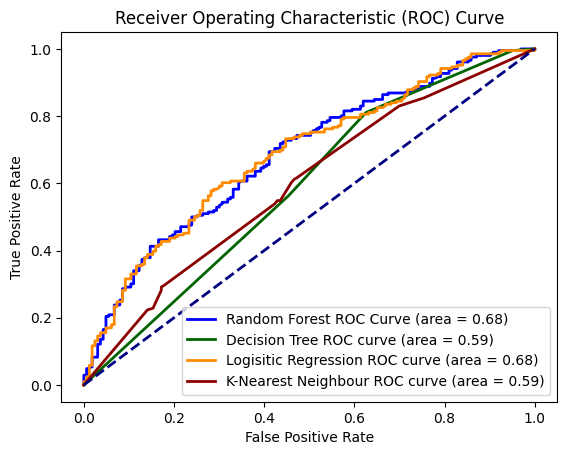

In [301]:
#in order to choose the best classifier we will use roc curve 
#plot the roc curve for the four algorithms 

import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score, auc

#Random forest proba
fpr, tpr, _ = metrics.roc_curve(y_test, random_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color = 'blue', lw = 2,
        label = 'Random Forest ROC Curve (area = %0.2f)' % roc_auc)

#decision tree proba
fpr, tpr, _ = metrics.roc_curve(y_test,  dt_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkgreen', lw=2, label='Decision Tree ROC curve (area = %0.2f)' % roc_auc)

#Logistic proba
fpr, tpr, _ = metrics.roc_curve(y_test,  log_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label='Logisitic Regression ROC curve (area = %0.2f)' % roc_auc)

#decision tree proba
fpr, tpr, _ = metrics.roc_curve(y_test,  knn_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkred', lw=2, label='K-Nearest Neighbour ROC curve (area = %0.2f)' % roc_auc)

# Plotting the ROC curve

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [302]:
# so we decide to use logistic regression out of the 4 models

best_params = grid_search_log.best_params_

best_params

{'C': 0.08858667904100823, 'penalty': 'l2', 'solver': 'sag'}

In [304]:
# next is to use the dataset for next year and after doing the same data mining techniques
# to that dataset, we can save it to a csv file and read it

X_2022 = pd.read_csv("C:/Users/jband/Documents/Josh Masters/Dissertation/code/2022 dataset/2022_code.csv")
y_2022 = pd.read_csv("C:/Users/jband/Documents/Josh Masters/Dissertation/code/2022 dataset/2022_code_y.csv")

X_2022

,Visitor_Atlanta Hawks,Visitor_Boston Celtics,Visitor_Brooklyn Nets,Visitor_Charlotte Hornets,Visitor_Chicago Bulls,Visitor_Cleveland Cavaliers,Visitor_Dallas Mavericks,Visitor_Denver Nuggets,Visitor_Detroit Pistons,Visitor_Golden State Warriors,...,Home_Portland Trail Blazers,Home_Sacramento Kings,Home_San Antonio Spurs,Home_Toronto Raptors,Home_Utah Jazz,Home_Washington Wizards,Home_Last_Win,Visitor_Last_Win,home_team_rank_higher,Previous_Home_Win_Against_Same_Away
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0
1226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1
1227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1
1228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0


In [ ]:
# lets predict it using the logistic regression model using best parameters / backtesting

model_logistic = LogisticRegression(C = 0.08858667904100823, penalty = 'l2', solver = 'liblinear')
model_logistic.fit(X,y) # train the 2021 dataset entirely X and y 

# predict for the 2022 dataset
model_prediction = model_logistic.predict(X_2022)

print(classification_report(y_2022, model_prediction))
print(confusion_matrix(y_2022, model_prediction))

Logistic Regression has a training score of 63.0 % accuracy score


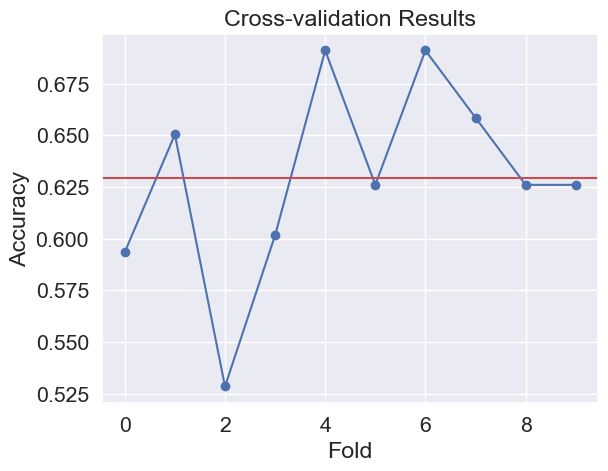

In [162]:
#sk_folds = StratifiedKFold(n_splits = 5)

model_score = cross_val_score(model_logistic, X, y, cv = 10)
print("Logistic Regression has a training score of", 
      round(model_score.mean(), 2) * 100, "% accuracy score")

plt.plot(model_score, 'bo', linestyle= '-')
plt.title('Cross-validation Results')
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.axhline(y=model_score.mean(), color='r')
plt.show()

[[271 245]
 [238 476]]


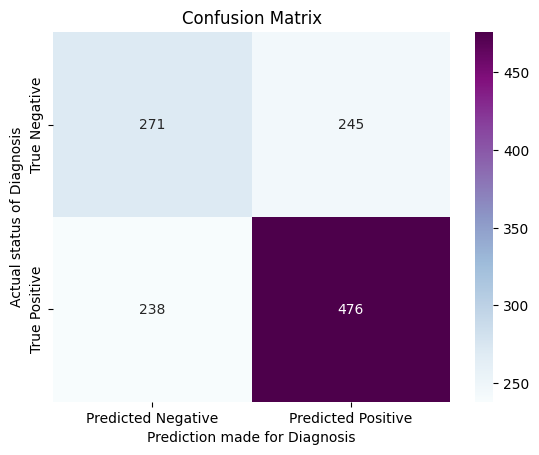

In [79]:
# a deeper look into logistic regression using confusion matrix

from sklearn.metrics import confusion_matrix

ConfusionMatrix = confusion_matrix(y_2022, model_prediction)
print(ConfusionMatrix)

ax = sns.heatmap(ConfusionMatrix, annot=True, cmap='BuPu', fmt='g')
ax.set_title('Confusion Matrix');
ax.set_xlabel('Prediction made for Diagnosis')
ax.set_ylabel('Actual status of Diagnosis');
## Ticket labels – List must be in alphabetical order
ax.xaxis.set_ticklabels(['Predicted Negative','Predicted Positive'])
ax.yaxis.set_ticklabels(['True Negative','True Positive'])
## Display the visualization of the Confusion Matrix.
plt.show()

[0.0388222  0.02759616 0.00379479 0.0038231  0.0041313  0.00483568
 0.00412573 0.00409516 0.00385994 0.00582198 0.00542476 0.00317316
 0.0045561  0.00781337 0.00494723 0.00687744 0.00474522 0.00466565
 0.0039531  0.00381452 0.00308261 0.00430417 0.00482369 0.00614557
 0.00448455 0.00841871 0.00514925 0.0046339  0.00462997 0.00344114
 0.00326775 0.00412261 0.32988214 0.00235796 0.0023267  0.00190827
 0.00163514 0.00198318 0.00273338 0.00283384 0.00148415 0.00365969
 0.00245363 0.00420897 0.00292929 0.00251361 0.00279714 0.00249054
 0.00237044 0.00192888 0.0020383  0.00198209 0.00294797 0.0040629
 0.00348106 0.00164426 0.00270612 0.0025316  0.00228026 0.00247579
 0.00351948 0.0020659  0.00198227 0.30635373 0.00240785 0.00302996
 0.00405436 0.00185762 0.00209446 0.00211034 0.00287209 0.00253965
 0.00196369 0.00264496 0.00248059 0.00294366 0.00323208 0.00329891
 0.00320788 0.00270939 0.00322306 0.0038858  0.00389704 0.00315026
 0.00186309 0.00241402 0.00235674 0.00213242 0.00235604 0.00495

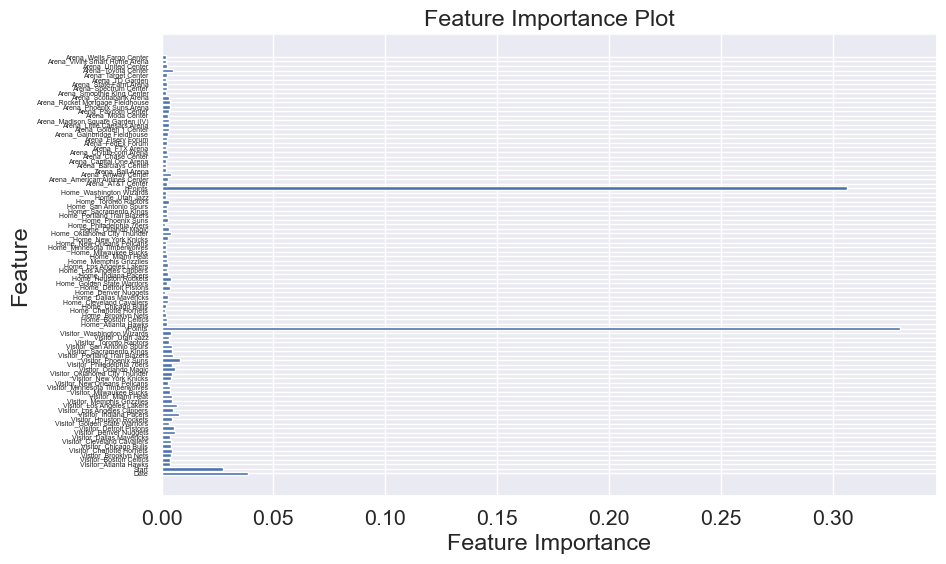

In [137]:
# feature selection next using random forest 
from sklearn.ensemble import RandomForestClassifier

l = pd.concat([df['Date'], df['Start'], encoded_df_away, df['vPoints'], encoded_df_home,
              df['hPoints'], encoded_df_arena],axis = 1)

l.columns = l.columns.astype(str)

# Create a Random Forest model
model = RandomForestClassifier()

# Fit the model
model.fit(l, y)

# Get feature importances
feature_importances = model.feature_importances_

print(feature_importances)

# Create a bar plot to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(l.shape[1]), feature_importances, align='center')
plt.yticks(range(l.shape[1]), list(l.columns), fontsize = 5)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()
